<a href="https://colab.research.google.com/github/trgtnkt/Pandas-Project/blob/main/%5BC4%5D_Homework_1_Basic_Statiscal_Measures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt


from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Airbnb_Data.csv')

Mounted at /content/drive


<ipython-input-1-51be189ff36c>:10: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Airbnb_Data.csv')


In [ ]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000

In [ ]:
#Observe the lines of the data
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,966.0,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
#Data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [ ]:
print(df.columns)

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')


In [ ]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified                 0
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [ ]:
percentnull =df.isnull().sum()/len(df)*100

df2 = pd.DataFrame({
    'columns_name': df.columns,
    'percent_null': percentnull
})
df2

,columns_name,percent_null
id,id,0.000000
NAME,NAME,0.243667
host id,host id,0.000000
host_identity_verified,host_identity_verified,0.281679
host name,host name,0.395715
neighbourhood group,neighbourhood group,0.028265
neighbourhood,neighbourhood,0.015595
lat,lat,0.007797
long,long,0.007797
country,country,0.518524


In [ ]:
#đổi cột host_identity_verified từ NaN sang unconfirmed hết
df['host_identity_verified'].fillna('unconfirmed', inplace=True)

In [ ]:
# Find duplicate values in all data
df[df.duplicated()]

In [ ]:
#Eliminate the duplicates
df = df.drop_duplicates()

In [ ]:
df.shape

(101572, 26)

Vì cột price với service fee có phần trăm null dưới 30% nên sẽ bỏ hết


In [ ]:
# drop na trong cot price va service fee
df.dropna(subset=['price','service fee'], inplace=True)
df.isnull().sum()

id                                     0
NAME                                 247
host id                                0
host_identity_verified               284
host name                            401
neighbourhood group                   28
neighbourhood                         15
lat                                    8
long                                   8
country                              527
country code                         122
instant_bookable                      96
cancellation_policy                   71
room type                              0
Construction year                    204
price                                  0
service fee                            0
minimum nights                       409
number of reviews                    183
last review                        15843
reviews per month                  15828
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [ ]:
#caculate mean, median, mode
#change price into float type
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = df['price'].astype(float)

<ipython-input-17-a5cca190fea7>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$','')


In [ ]:
price_mean = df['price'].mean()
price_mode = df['price'].mode()
price_median = df['price'].median()

print('price mean: '+ str(price_mean))
print('price mode: '+ str(price_mode))
print('price median: '+ str(price_median))

price mean: 625.2935360325152
price mode: 0    206.0
Name: price, dtype: float64
price median: 624.0


In [ ]:
# change service_fee to float
df['service fee'] = df['service fee'].str.replace('$','')
df['service fee'] = df['service fee'].str.replace(',','')
df['service fee'] = df['service fee'].astype(float)

<ipython-input-18-cf22d3688648>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['service fee'] = df['service fee'].str.replace('$','')


In [ ]:
SF_mean = df['service fee'].mean()
SF_mode = df['service fee'].mode()
SF_median = df['service fee'].median()

print('service fee mean: '+ str(SF_mean))
print('service fee mode: '+ str(SF_mode))
print('service fee median: '+ str(SF_median))

service fee mean: 125.02692375349373
service fee mode: 0    41.0
Name: service fee, dtype: float64
service fee median: 125.0




1. Price: có mean > median > mode => Data distribution: right skewed
2. Service fee: có mean > median > mode => Data distribution: right skewed



<Axes: >

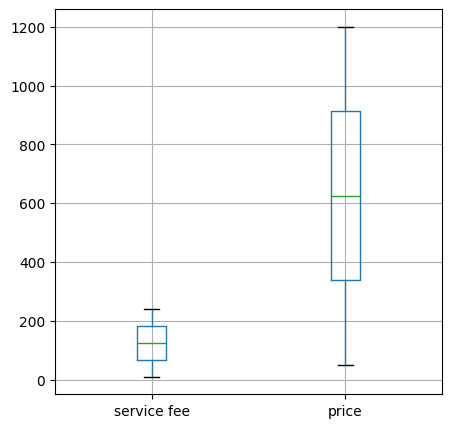

In [ ]:
df.boxplot(column=['service fee', 'price'], figsize=(5,5))

Insights: Find the answer for these questions

1.   Is the average service fee for instant bookable places are higher than average service fee for those places are not?
2.   What is the room_type that has highest average price?
3.   Where is the neighbourhood_group that has highest host identity verified rate?



In [ ]:
#Q1 Is the average service fee for instant bookable places are higher than average service fee for those places are not?
avai_book = df.groupby('instant_bookable').mean()
avai_book['service fee']
# nearly the same

<ipython-input-31-405c42e8ebac>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avai_book = df.groupby('instant_bookable').mean()


instant_bookable
False    125.005992
True     125.069594
Name: service fee, dtype: float64

In [ ]:
#Q2 What is the room_type that has highest average price?
roomtype_price = df.groupby('room type').agg({'price':'mean'}).sort_values(by='price',ascending=False)
roomtype_price
# Hotel room has the highest avg price

,price
room type,
Hotel room,663.561404
Shared room,633.967494
Private room,624.958990
Entire home/apt,624.941408


In [ ]:
#Q3 Where is the neighbourhood_group that has highest host identity verified rate?
df['vrf'] = df['host_identity_verified'].apply(lambda x: 1 if x == 'verified' else 0 )

nb_group = df.groupby('neighbourhood group').agg({'vrf':'sum'})
nb_all = df.groupby('neighbourhood group').count()

dff = nb_group['vrf']
dfx = nb_all['host_identity_verified']

dfc = pd.concat([dff,dfx], axis=1, join='inner')
percent_verified = dfc.vrf/dfc.host_identity_verified*100
percent_verified

neighbourhood group
Bronx             49.019608
Brooklyn          49.989214
Manhattan         49.953062
Queens            50.098187
Staten Island     49.157895
brookln          100.000000
manhatan         100.000000
dtype: float64

In [ ]:
nb_all

,id,NAME,host id,host_identity_verified,host name,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license,vrf
neighbourhood group,,,,,,,,,,,,,,,,,,,,,,,,,,
Bronx,2712,2704,2712,2703,2704,2712,2712,2712,2694,2711,2711,2711,2712,2709,2705,2706,2704,2712,2361,2361,2695,2704,2696,1138,0,2712
Brooklyn,41842,41734,41842,41719,41678,41834,41839,41839,41622,41778,41785,41800,41842,41745,41749,41724,41687,41772,35968,35973,41724,41705,41653,20786,2,41842
Manhattan,43792,43689,43792,43675,43613,43784,43788,43788,43569,43744,43756,43769,43792,43702,43682,43682,43599,43718,35989,35994,43648,43647,43626,22104,0,43792
Queens,13267,13239,13267,13240,13218,13267,13266,13266,13205,13252,13259,13259,13267,13249,13234,13232,13219,13228,11509,11511,13228,13240,13202,5990,0,13267
Staten Island,955,954,955,950,950,955,955,955,947,954,954,954,955,954,952,952,951,955,852,852,949,953,954,428,0,955
brookln,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1
manhatan,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1


In [ ]:
#def numeric_host_verify




In [ ]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')